In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# from sklearn.datasets import load_boston
# from sklearn.datasets import load_iris, load_breast_cancer
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model import LogisticRegression, LinearRegression
# from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
# 

# from sklearn.ensemble import RandomForestClassifier


# import warnings
# warnings.filterwarnings('ignore')
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# from sklearn.model_selection import GridSearchCV



In [26]:
def heat_map(num_df):
    corr = num_df.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=(18, 12))
        ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [3]:
def random_forest_classifier_df(this_X_train, this_y_train, this_min_dpth:[int]=2, this_max_dpth:[int]=5, 
                                this_min_cv:[int]=5, this_max_cv:[int]=25, this_random_state=42):
    result_df = pd.DataFrame()
    for md in range(this_min_dpth, this_max_dpth+1):
        print(f"Depth: {md} -> ", end="")
        for cv_s in range(this_min_cv,this_max_cv+1,5):
            print(f"{cv_s}, ", end="")
            clf = RandomForestClassifier(max_depth=md, random_state=this_random_state)
            cross_val_scores = cross_val_score(clf, X_train, y_train, cv=cv_s)
            result_df = pd.concat([pd.DataFrame([[md, cv_s, np.mean(cross_val_scores)]]), result_df], axis=0)
        print(" ... done.")
    result_df.rename(columns={0: 'max_depth', 1: 'cv', 2:"mean_score"}, inplace=True)
    return result_df

In [30]:
data_ = pd.read_csv("./data/combined_numbers_weather_days_2018-2020.csv")

In [31]:
data_.columns
# data_.head()


Index(['month', 'bicycle', 'car', 'pedestrian', 'motorbike', 'truck', 'other',
       'slightly_injured', 'seriously_injured', 'fatal', 'total_acc_w_injury',
       'alcohol_related', 'daylight', 'dark', 'dusk', 'dry', 'wet', 'icy',
       'YYYYMM', 'bank_holiday', 'school_vacation', 'lockdown',
       'percipation_mm', 'sunshine_hours', 'snow_height_mm', 'aver_temp'],
      dtype='object')

In [32]:
data_.head()


,month,bicycle,car,pedestrian,motorbike,truck,other,slightly_injured,seriously_injured,fatal,...,wet,icy,YYYYMM,bank_holiday,school_vacation,lockdown,percipation_mm,sunshine_hours,snow_height_mm,aver_temp
0,2018_01,245,758,247,50,28,129,720,161,3,...,509,17,201801,1,0,0,67.2,19.5,3.0,3.6
1,2018_02,201,640,153,39,30,101,608,119,3,...,107,21,201802,0,6,0,2.7,98.5,0.0,-0.9
2,2018_03,222,700,154,65,27,110,691,109,2,...,265,21,201803,1,6,0,44.1,84.4,1.5,1.8
3,2018_04,453,1008,148,214,38,168,1011,202,4,...,150,0,201804,1,7,0,38.0,170.9,0.0,13.7
4,2018_05,679,1174,190,257,62,184,1199,261,2,...,38,0,201805,3,2,0,15.2,232.2,0.0,17.9


In [33]:
data_.columns

Index(['month', 'bicycle', 'car', 'pedestrian', 'motorbike', 'truck', 'other',
       'slightly_injured', 'seriously_injured', 'fatal', 'total_acc_w_injury',
       'alcohol_related', 'daylight', 'dark', 'dusk', 'dry', 'wet', 'icy',
       'YYYYMM', 'bank_holiday', 'school_vacation', 'lockdown',
       'percipation_mm', 'sunshine_hours', 'snow_height_mm', 'aver_temp'],
      dtype='object')

In [59]:
# X = data_.drop(columns=['month', 'slightly_injured', 'seriously_injured', 'fatal', 'total_acc_w_injury', 'YYYYMM', "aver_temp"], axis = 1)
X = data_.drop(columns=['month', 'slightly_injured', 'seriously_injured', 'fatal', 'total_acc_w_injury', 'YYYYMM', "aver_temp",
                        "car", "daylight", "bicycle", "motorbike", "pedestrian", "truck", "dry", "sunshine_hours", "dusk", "dark"], axis = 1) 


y = data_['total_acc_w_injury']


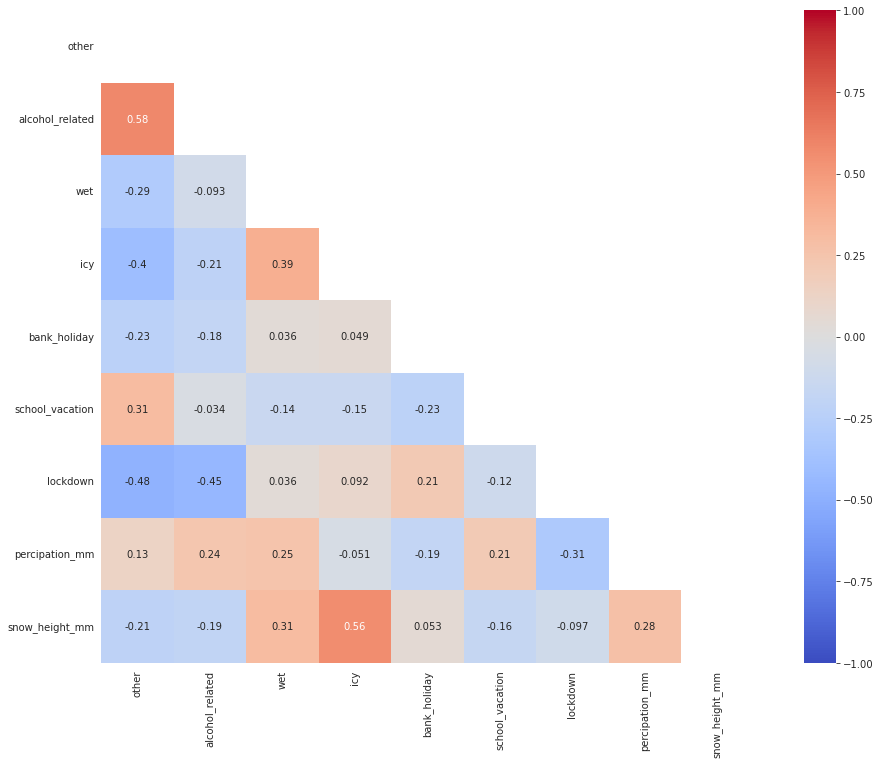

In [60]:
heat_map(X)

In [61]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2,random_state=42)

In [62]:
X_train_scaled=StandardScaler().fit(X_train).transform(X_train)
X_test_scaled=StandardScaler().fit(X_train).transform(X_train)

In [63]:
X_train_const_scaled = sm.add_constant(X_train_scaled) # adding a constant

model = sm.OLS(y_train, X_train_const_scaled).fit()
predictions_train = model.predict(X_train_const_scaled) 

X_test_const_scaled = sm.add_constant(X_test_scaled) # adding a constant
predictions_test = model.predict(X_test_const_scaled) 
print_model = model.summary()

print(print_model)

                            OLS Regression Results                            
Dep. Variable:     total_acc_w_injury   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     15.98
Date:                Mon, 07 Mar 2022   Prob (F-statistic):           7.30e-07
Time:                        13:01:35   Log-Likelihood:                -161.45
No. Observations:                  28   AIC:                             342.9
Df Residuals:                      18   BIC:                             356.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1102.9643     18.207     60.579      0.0

In [66]:
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train



model.coef_

print(list(zip(model.coef_, X_train.columns)))

coef_dict = {}
for coef, feat in list(zip(model.coef_, X.columns)):
    coef_dict[feat] = abs(coef)

[(239.44818993964228, 'other'), (-1.9839460383599798, 'alcohol_related'), (2.7875566038334787, 'wet'), (7.7025293238909205, 'icy'), (25.172277089956694, 'bank_holiday'), (-19.725620648995392, 'school_vacation'), (26.32146651502641, 'lockdown'), (10.992331493536689, 'percipation_mm'), (-27.898144549831365, 'snow_height_mm')]


In [67]:
coef_dict

{'other': 239.44818993964228,
 'alcohol_related': 1.9839460383599798,
 'wet': 2.7875566038334787,
 'icy': 7.7025293238909205,
 'bank_holiday': 25.172277089956694,
 'school_vacation': 19.725620648995392,
 'lockdown': 26.32146651502641,
 'percipation_mm': 10.992331493536689,
 'snow_height_mm': 27.898144549831365}